In [6]:
%matplotlib widget

## Notes

## Problems

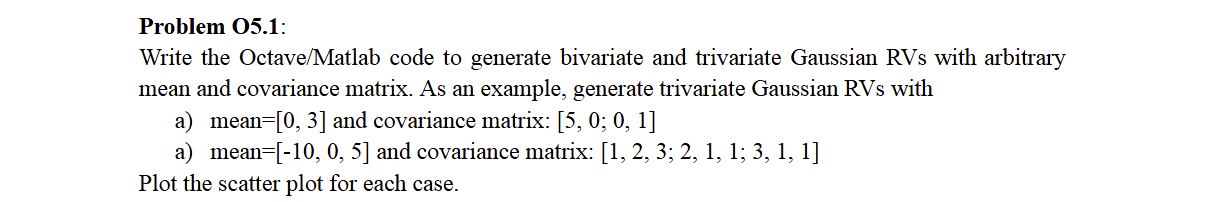

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def create_data(mean, cov, num_samples):
    return np.random.multivariate_normal(mean, cov, num_samples)


In [8]:
# a)

mean = [0, 3]
cov = [[5,0],[0,1]]

x = create_data(mean, cov, 1000)

#plt.figure()
#plt.scatter(x[:, 0], x[:, 1])

/tmp/ipykernel_15/3723919467.py:5: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  return np.random.multivariate_normal(mean, cov, num_samples)


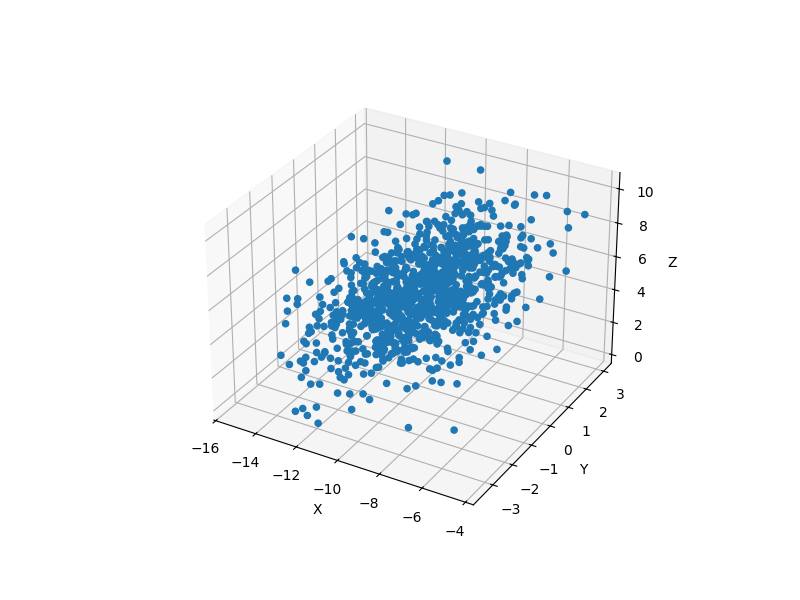

In [9]:
# b)

from mpl_toolkits.mplot3d import Axes3D

mean = [-10, 0, 5]
cov = [[1,2,3],[2,1,1], [3, 1, 1]]

x = create_data(mean, cov, 1000)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], alpha=1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

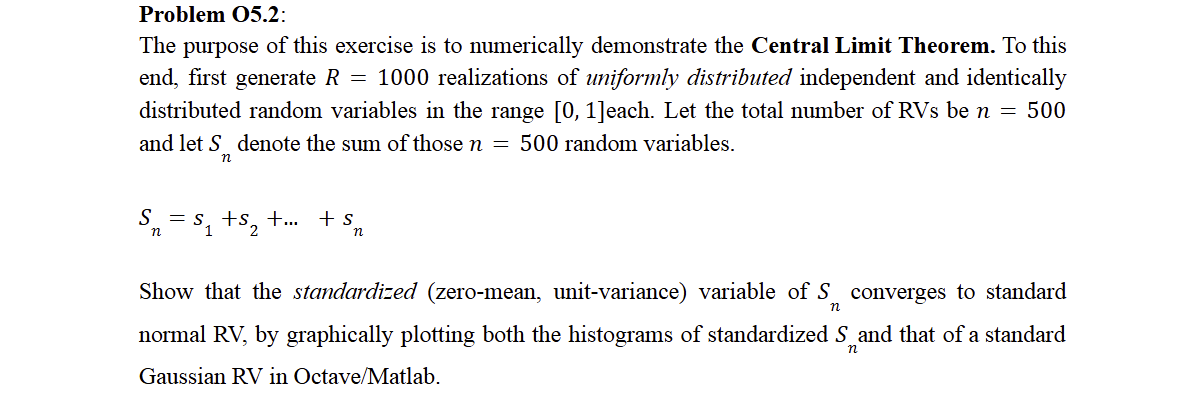

(500, 1000)


(array([  3.,   6.,  31.,  63.,  89., 111.,  99.,  65.,  22.,  11.]),
 array([-3.25264866, -2.66744052, -2.08223238, -1.49702423, -0.91181609,
        -0.32660795,  0.25860019,  0.84380834,  1.42901648,  2.01422462,
         2.59943277]),
 <BarContainer object of 10 artists>)

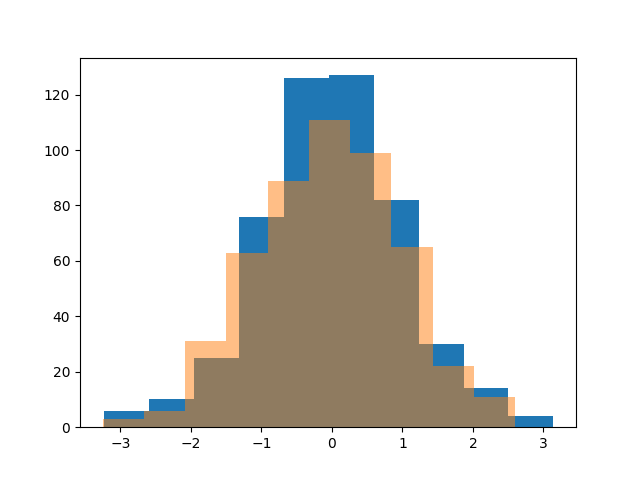

In [10]:
num_samples = 1000
N = 500

rvs = []
for n in range(N):
    rvs += [np.random.uniform(low=0.0, high=1.0, size=num_samples)]

rvs = np.vstack(rvs)
print(rvs.shape)

rvs_sum = np.sum(rvs, axis=1)
mean = np.mean(rvs_sum)
std = np.std(rvs_sum)

rvs_standard = (rvs_sum - mean)/std

# Draw standard
x = np.random.normal(loc=0, scale=1, size=N)

plt.figure()
plt.hist(rvs_standard)
plt.hist(x.flatten(), alpha=0.5)

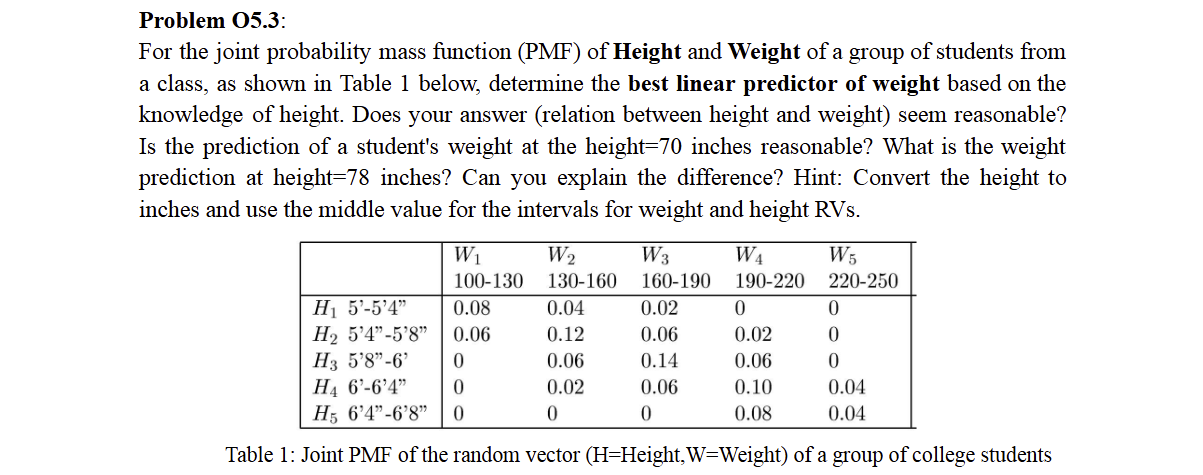

### Best Linear Predictor

We want to predict some random variable $Y$ from predcitors $X$, resulting in $Y=Ax+B$

To obtain the best linear predictor we use the following cost function

$$
J(a,b) = \mathbb{E}\left[(Y - (a + b^\top X))^2\right]
$$

Here the prediction error is $e = Y - (a + b^\top X).$

To get the best predictor, we take the partial derivatives with respect to $A$ and $b$

$$
\frac{\partial J}{\partial a} = -2 \, \mathbb{E}[e] = 0 \quad \implies \quad \mathbb{E}[e] = 0
$$

$$
\frac{\partial J}{\partial b} = -2 \, \mathbb{E}[eX] = 0 \quad \implies \quad \mathbb{E}[eX] = 0
$$

Here we see that the expected error of the estimate is zero, and the error is uncorrelated with all predictors $\mathbb{E}[eX]=\mathbb{E}[(Y-\hat{Y})X]=0$

From the two properties, we can derive the values of a and b

$\mathbb{E}[Y-\hat{Y}]=\mathbb{E}[Y-aX-b]=\mathbb{E}[Y]-a\mathbb{E}[X]-b=\mu_y-a\mu_x-b=0$

$b=-a\mu_x+\mu_y$

$\mathbb{E}[(Y-\hat{Y})X]=\mathbb{E}[(Y-aX-b)X]=\mathbb{E}[YX-aX^2-bX]=\mathbb{E}[YX]-a\mathbb{E}[X^2]-b\mathbb{E}[X]$

Then we insert $b$

$\mathbb{E}[YX]-a\mathbb{E}[X^2]-(-a\mu_x+\mu_y)\mu_x=\mathbb{E}[YX]-\mu_y\mu_x-a(\mathbb{E}[X^2]-\mu_x^2))=0$

We know that $\mathbb{E}[X^2]-\mu_x^2=Var(X)$ and $\mathbb{E}[YX]-\mu_y\mu_x=Cov(Y,X)$ so the equation becomes

$Cov(Y,X)-aVar(X)=0$

We solve for a

$a=\frac{Cov(Y,X}{Var(X)}$

And substitute back into $b$

$b=-\frac{Cov(Y,X}{Var(X)}\mu_x+\mu_y$

Hence we get

$\hat{Y}=\frac{Cov(Y,X}{Var(X)}(X-\mu_x)+\mu_y$

We use the following to calculate expectation, variance and covariance from PMF

| Quantity            | Formula (using $p(x,y)$) |
|---------------------|-----------------------------|
| $\mathbb{E}[X]$   | $\sum_{x}\sum_{y} x \, p(x,y)$ |
| $\mathbb{E}[Y]$   | $\sum_{x}\sum_{y} y \, p(x,y)$ |
| $\mathbb{E}[XY]$  | $\sum_{x}\sum_{y} xy \, p(x,y)$ |
| $\mathrm{Var}(X)$ | $\sum_{x}\sum_{y} x^2 p(x,y) - (\mathbb{E}[X])^2$ |
| $\mathrm{Var}(Y)$ | $\sum_{x}\sum_{y} y^2 p(x,y) - (\mathbb{E}[Y])^2$ |
| $\mathrm{Cov}(X,Y)$ | $\sum_{x}\sum_{y} xy p(x,y) - \mathbb{E}[X]\mathbb{E}[Y]$ |

mu_x: 69.68
mu_y: 172.00000000000003
var_x: 24.21759999999813
var_y: 1232.999999999989
cov: 131.03999999999905
rho: 0.7583274820636349
a: 5.410940803383043
b: -205.03435517973045
Weight at 70.0: 173.73150105708257
Weight at 78.0: 217.0190274841469


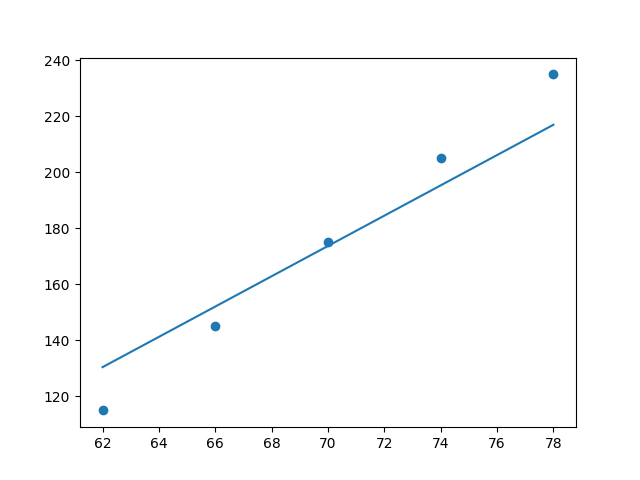

In [12]:
# Table as numpy array

pmf = [
    [0.08, 0.04, 0.02, 0   , 0   ],
    [0.06, 0.12, 0.06, 0.02, 0   ],
    [0   , 0.06, 0.14, 0.06, 0   ],
    [0   , 0.02, 0.06, 0.10, 0.04],
    [0   , 0   , 0   , 0.08, 0.04]
]

height = [62.0 ,66.0 ,70.0 ,74.0 ,78.0]
weight = [115.0,145.0,175.0,205.0,235.0]

# Convert the list of lists to a NumPy array
pmf = np.array(pmf)
height = np.array(height)
weight = np.array(weight)

# Compute marginal of x 
p_x = np.sum(pmf, axis=1)

# Compute marginal of y
p_y = np.sum(pmf, axis=0)

# Find expected value of x
mu_x = np.sum(height * p_x)

# Find expected value of y
mu_y = np.sum(weight * p_y)

# Find variance of X: E[X^2]-mu_x^2
var_x = np.sum(height**2 * p_x) - mu_x**2

# Find variance of Y: E[Y^2]-mu_Y^2
var_y = np.sum(weight**2 * p_y) - mu_y**2

# Find covariance: E[YX]-mu_y*mu_x
cov = 0
for i in range(len(height)):
    for j in range(len(weight)):
        cov += height[i]*weight[j]*pmf[i, j]

cov = cov - mu_y*mu_x
rho = cov/(np.sqrt(var_x)*np.sqrt(var_y))
a = cov/var_x
b = -a*mu_x+mu_y

def predict(x):
    return cov/var_x*(x-mu_x)+mu_y

height_prediction = 70.0
print(f"Weight at {height_prediction}: {predict(height_prediction)}")
height_prediction = 78.0
print(f"Weight at {height_prediction}: {predict(height_prediction)}")

height_ = np.linspace(height[0], height[-1], 100)
weight_ = np.array([predict(h) for h in height_])

print(f"mu_x: {mu_x}")
print(f"mu_y: {mu_y}")
print(f"var_x: {var_x}")
print(f"var_y: {var_y}")
print(f"cov: {cov}")
print(f"rho: {rho}")
print(f"a: {a}")
print(f"b: {b}")


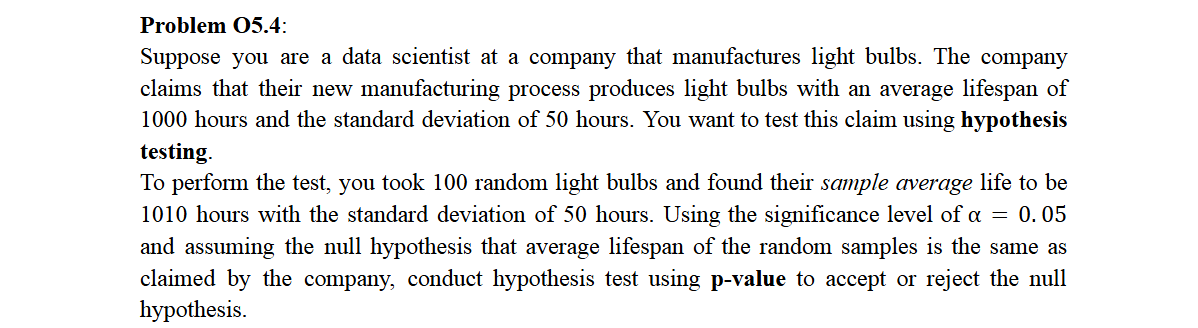

### Hypothesis testing

In hypothesis testing we form a null hypothesis $H_0$ and an alternative hypothesis $H_1$

When we are testing for either $H_0:\mu=\mu_0$ or $H_0:\mu<\mu_0$, one tailed, we are evaluating the probability for getting a smaller value than the observed value mean.

The probability is normally set to 5%(0.05). If the probability of getting a more extreme value is less than that, we reject the null hypothesis $H_0$.

For normally distributed data, we either know the variance and use the normal distribution 

$$
Z = \frac{\bar{X} - \mu_0}{\sigma / \sqrt{n}} \sim N(0,1) \quad \text{under } H_0
$$

or we estimate it and use t-test

$$
T = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} \sim t_{n-1} \quad \text{under } H_0
$$

Where $s$ is sample standard deviation. 

For large $n$ they are approximately the same.

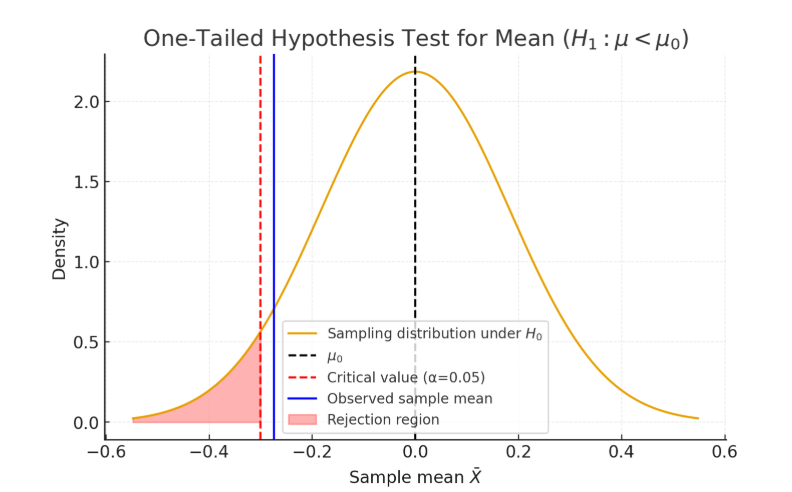

When we are testing $H_0:\mu=\mu_0$ or $H_0:\mu\neq\mu_0$, two tailed, we are calcuating the probability for getting a more extreme value in either end.

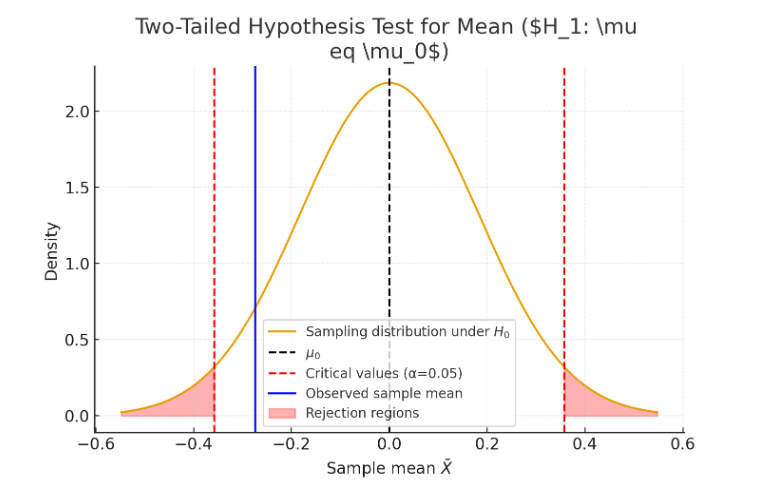

### Answer

We have $H_0:\mu=1000$ and $H_1:\mu \neq 1000$

From the problem we have that $\bar{x}=1010$ and $s=50$

We then calculate the t-statistic, since we dont know the population mean but have estimated it

$$
T = \frac{\bar{X} - \mu_0}{s / \sqrt{n}} = \frac{1010-1000}{50\sqrt{100}}=2
$$

We input the t-statistic to the t-distribution CDF to get the one-sided p value. 
Since the t-distribution is symmetric the probability of getting a more extreme value in either end is two times that.
We use the absolute value of the t-statistic since we know that is the right tail.

$$
p = P[T>|t|]=2(1-F_{df}(|t|))=0.0482
$$

Where $F_{df}$ is the t-distribution and $t$ is the test statistic.

Since $p=0.0482$ and $\alpha=0.05$, then $p<\alpha$ and we reject $H_0$

In [21]:
import numpy as np
from scipy.stats import norm, t

alpha = 0.05
mu_0 = 1000
mu_sample = 1010
s_sample = 50
N = 100
degrees_of_freedom = N - 1

t_statistic = (mu_sample-mu_0)/(s_sample/np.sqrt(N))

print(f"t_statistic={t_statistic}")

#We use the absolute value of the t-statistic since we know that is the right tail.
p = 2*(1-t.cdf(x=np.abs(t_statistic), df=N)) 

print(f"p={p:.4f}, H_0 rejected: {p<alpha}")

t_statistic=2.0
p=0.0482, H_0 rejected: True


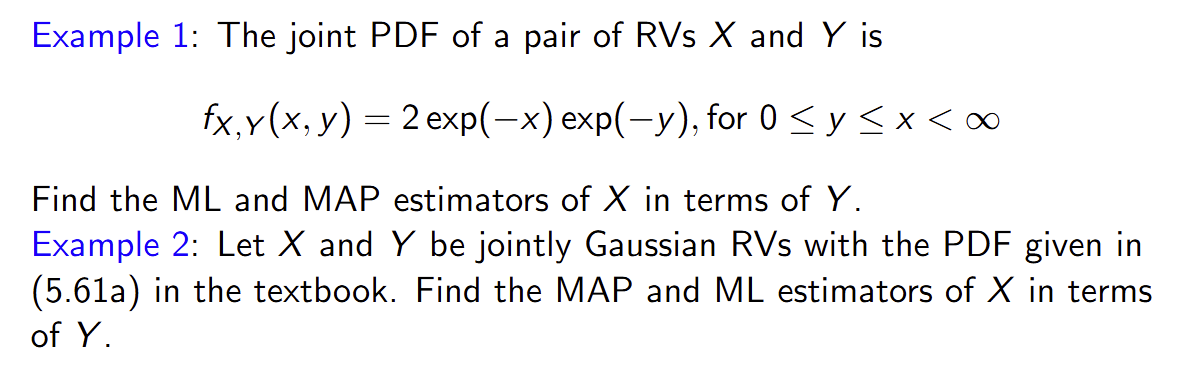

### Maximum Likelihood Estimator(MLE)

When estimating some parameter X from observed Values Y, the maximum likelihood estimator aims to 
select X, such the that likelihood of observing Y is maximized.

$$
\max_{x} P[Y=y|X=x]
$$

For continous distributions this becomes

$$
\max_{x} f_{Y|X}(Y=y|X=x)
$$

### Maximum A Posteriori Estimator(MAP)

When estimating some parameter X from observed Values Y, the maximum a posteriori estimator aims to 
maximize the posterior likelihood of X, given some observed value Y

$$
\max_{x} P[X=x|Y=y]=\max_{x} \frac{P[Y=y|X=x]P[X=x]}{P[Y=y]}=\max_{x} P[Y=y|X=x]P[X=x]
$$

Since $P[Y=y]$ is constant when maximizing over $x$.

For continous distributions this becomes

$$
\max_{x} f_{Y|X}(X=x|Y=y)=\max_{x} \frac{f_{Y|X}(Y=y|X=x)f_x(X=x)}{f_y(Y=y)}=\max_{x} f_{Y|X}(Y=y|X=x)f_x(X=x)
$$


### Marginal distributions

We find the marginal distributions

$$
f_x(x)=\int_0^x f_{X,Y}(x,y) \, dy = \int_0^x 2e^{-y}e^{-x} \, dy = 2e^{-x}(1-e^{-x})
$$

Since $0 \leq y \leq x$

$$
f_y(y)=\int_y^\infty f_{X,Y}(x,y) \, dx = \int_0^x 2e^{-y}e^{-x} \, dx = 2e^{-2}
$$

Since $y \leq x \leq \infty$

### Finding the MLE estimator

We use Bayes rule $P[Y|X]=\frac{P[X,Y]}{P[X]}$

$$
\max_{x} f_{Y|X}(Y=y|X=x)=\max_{x} \frac{f_{X,Y}(x,y)}{f_Y(y)}=\max_{x} \frac{2e^{-y}e^{-x}}{2e^{-x}(1-e^{-x})}=\max_{x} \frac{e^{-y}}{1-e^{-x})}
$$

Since $1-e^{-x}$ decreases as $x$ goes to infinity, the whole term increases, so we want to select the smallest possible value for $x$ which is $x=y$ since $x \geq y$

$\hat{x}_{MLE}=y$

We use Bayes rule $P[X|Y]=\frac{P[X,Y]}{P[Y]}$

$$
\max_{x} f_{X|Y}(X=x|Y=y)=\frac{f_{X,Y}(x,y)}{f_Y(y)}=\frac{2e^{-y}e^{-x}}{2e^{-2}}=e^{y-x}
$$

Since $e^{y-x}$ increases as $x$ goes to infinity, we want to select the smallest possible value for $x$ which is $x=y$ since $x \geq y$  

$\hat{x}_{MAP}=y$